<a href="https://colab.research.google.com/github/SmartNandini/Music_Genre/blob/main/CNN_OurOwn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import random
import librosa
import math
import sklearn

In [2]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    mapping = data["mapping"]

    print("Data succesfully loaded!")

    return  X, y, mapping

In [5]:
# path to json
DATA_PATH = "/content/gdrive/MyDrive/Program_Datasets/ourdata.json"

# load data
X, y, mapping = load_data(DATA_PATH)

Data succesfully loaded!


In [6]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]


X_train.shape

(5040, 517, 13, 1)

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [8]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 515, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 258, 6, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 258, 6, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 4, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 2, 32)       0         
 2D)                                                             
                                                        

In [11]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
158/158 [==============================] - 37s 226ms/step - loss: 2.5906 - accuracy: 0.2095 - val_loss: 2.0219 - val_accuracy: 0.2857
Epoch 2/50
158/158 [==============================] - 29s 184ms/step - loss: 1.9682 - accuracy: 0.3454 - val_loss: 1.6899 - val_accuracy: 0.4333
Epoch 3/50
158/158 [==============================] - 26s 167ms/step - loss: 1.7106 - accuracy: 0.4161 - val_loss: 1.5823 - val_accuracy: 0.4698
Epoch 4/50
158/158 [==============================] - 26s 167ms/step - loss: 1.5664 - accuracy: 0.4635 - val_loss: 1.5337 - val_accuracy: 0.4794
Epoch 5/50
158/158 [==============================] - 29s 184ms/step - loss: 1.4635 - accuracy: 0.5044 - val_loss: 1.4622 - val_accuracy: 0.5135
Epoch 6/50
158/158 [==============================] - 27s 170ms/step - loss: 1.3400 - accuracy: 0.5468 - val_loss: 1.4403 - val_accuracy: 0.5143
Epoch 7/50
158/158 [==============================] - 26s 166ms/step - loss: 1.2762 - accuracy: 0.5593 - val_loss: 1.4443 - val_ac

In [12]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

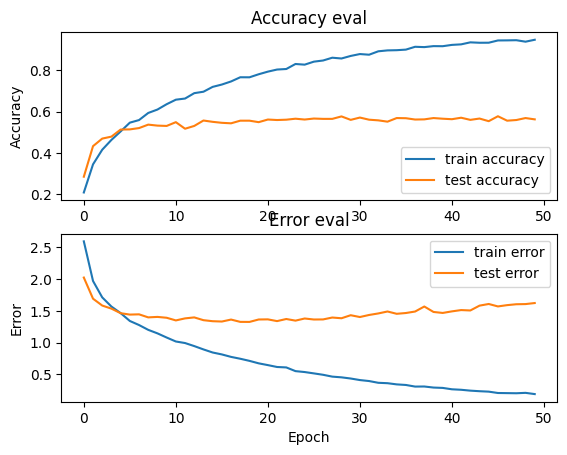

In [13]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [14]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

85/85 - 3s - loss: 1.6082 - accuracy: 0.5541 - 3s/epoch - 30ms/step

Test accuracy: 0.5540740489959717


In [15]:
model_cnn.save("/content/gdrive/MyDrive/Program_Datasets/CNN_ourdata2.h5")

In [16]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("/content/gdrive/MyDrive/Program_Datasets/CNN_ourdata2.h5")

In [19]:
y_pred = []

for a in X_test:

  x_to_test = a[np.newaxis, ...]
  prediction = reconstructed_model.predict(x_to_test, verbose = 0)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)
  y_hat = int(predicted_index)
  y_pred.append(y_hat)
  print(a)

temp = np.array(y_pred)
y_pred = temp

Streaming output truncated to the last 5000 lines.
  [  -6.85458326]
  [  -4.58294582]]]
[[[-7.61354492e+02]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]]

 [[-7.61354492e+02]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]]

 [[-7.61354492e+02]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]]

 ...

 [[-2.75423553e+02]
  [ 2.23511276e+02]
  [-9.28349991e+01]
  ...
  [-1.35287037e+01]
  [ 3.32314968e-02]
  [-2.20379210e+00]]

 [[-2.81348511e+02]
  [ 2.15701599e+02]
  [-9.88323441e+01]
  ...
  [-1.90881348e+01]
  [-2.69888258e+00]
  [-1.62308693e+00]]

 [[-2.77799408e+02]
  [ 2.10598465e+02]
  [-8.80035782e+01]
  ...
  [-1.80563469e+01]
  [-1.10839736e+00]
  [ 1.02022588e+00]]]
[[[-1.58501877e+02]
  [ 8.89993591e+01]
  [-4.80575676e+01]
  ...
  [ 7.53336477e+00]
  [ 1.25168667e+01]
  [ 3.92670631e-02]]

 [[-1.252

In [20]:
mapping

['Jazz',
 'Rock',
 'Blues',
 'Classical',
 'Reggae',
 'Country',
 'Disco',
 'Hip-Hop',
 'Metal',
 'Pop']

In [21]:
genres = ['Jazz', 'Rock', 'Blues', 'Classical', 'Reggae', 'Country', 'Disco', 'Hiphop', 'Metal', 'Pop']

acc_score = sklearn.metrics.accuracy_score(y_test, y_pred)
j_score = sklearn.metrics.jaccard_score(y_test, y_pred, average = 'weighted')
j_classes = sklearn.metrics.jaccard_score(y_test, y_pred, average = None)
f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
f1_classes = sklearn.metrics.f1_score(y_test, y_pred, average=None)
precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
precision_classes = sklearn.metrics.precision_score(y_test, y_pred, average=None)
recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
recall_classes = sklearn.metrics.recall_score(y_test, y_pred, average=None)

In [22]:
print("Model Accuracy Metric: -")

print(f"Total Accuracy Score              :  {acc_score}" )
print(f"Weighted Average Jaccard Score    :  {j_score}" )
print(f"Weighted Average F1 Score         :  {f1}" )
print(f"Weighted Average Precision Score  :  {precision}" )
print(f"Weighted Average Recall Score     :  {recall}" )

Model Accuracy Metric: -
Total Accuracy Score              :  0.554074074074074
Weighted Average Jaccard Score    :  0.39487391278319384
Weighted Average F1 Score         :  0.5497290316559562
Weighted Average Precision Score  :  0.5511297681856905
Weighted Average Recall Score     :  0.554074074074074


In [23]:
j_classes

array([0.45617978, 0.21479714, 0.23556582, 0.76065574, 0.38709677,
       0.31294118, 0.37866667, 0.47765363, 0.49266862, 0.2475    ])

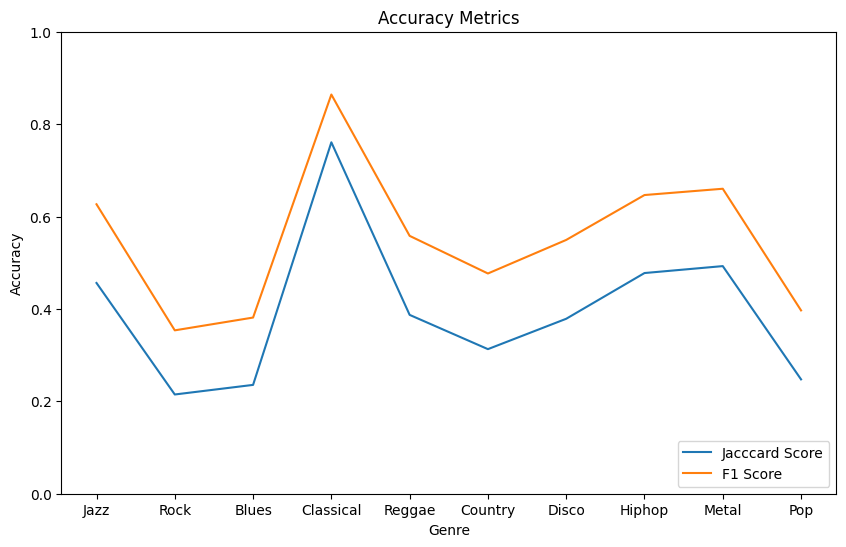

In [24]:
plt.figure(figsize=(10,6))
plt.plot(genres, j_classes, label="Jacccard Score")
plt.plot(genres, f1_classes, label="F1 Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Accuracy Metrics')
plt.legend(loc="lower right")
plt.show()

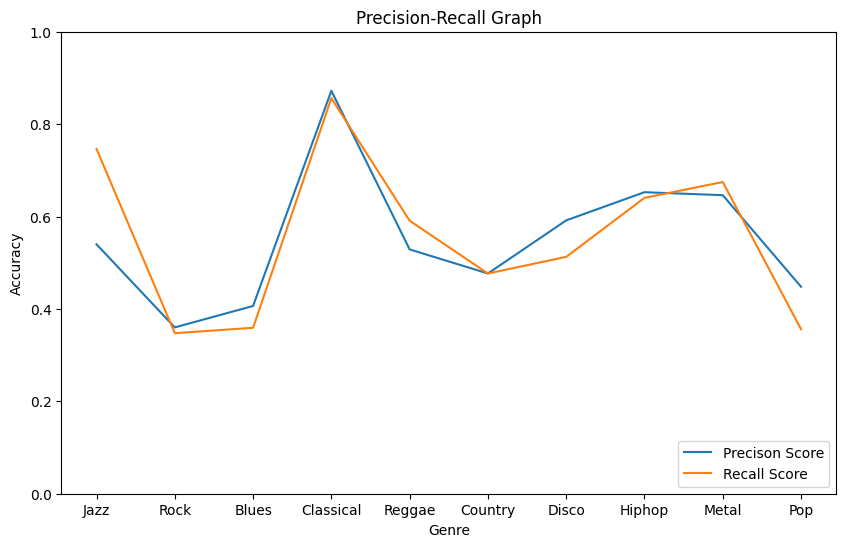

In [25]:
plt.figure(figsize=(10,6))
plt.plot(genres, precision_classes, label="Precison Score")
plt.plot(genres, recall_classes, label="Recall Score")

plt.ylim(0, 1)
plt.xlabel("Genre")
plt.ylabel("Accuracy")
plt.title('Precision-Recall Graph')
plt.legend(loc="lower right")
plt.show()